In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams.update({'font.size': 15})

In [50]:
# RAFi_MEKi_with_SOS1_faster
# RAFi_MEKi_no_SOS1_faster
# RAFi_MEKi_no_SOS1
# RAFi_MEKi_with_SOS_feedback_no_CRAF_feedback
dr_df_no_CRAF = pd.read_csv("dose_response_df/RAFi_MEKi_with_SOS_feedback_no_CRAF_feedback")
dr_df_CRAF = pd.read_csv("dose_response_df/RAFi_MEKi_with_SOS_feedback_and_CRAF_feedback")

# converts observables to percents
dr_df_no_CRAF[['pMEK_obs', 'pERK_obs']] *= 100
dr_df_CRAF[['pMEK_obs', 'pERK_obs']] *=  100

RAF = set(dr_df_no_CRAF["RAFi_0_uM"])
MEK = set(dr_df_no_CRAF["MEKi_0_uM"])

In [51]:


dr_df_no_CRAF = dr_df_no_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
dr_df_CRAF = dr_df_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])

['1.0', '1.0002', '1.001', '1.0041', '1.0174', '1.0755', '1.3594', '3.6504', '235.1656', '10000000000.0']


/local/7965683/ipykernel_13187/2308281939.py:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax, labels= list(matrix.columns.astype('str')) ,


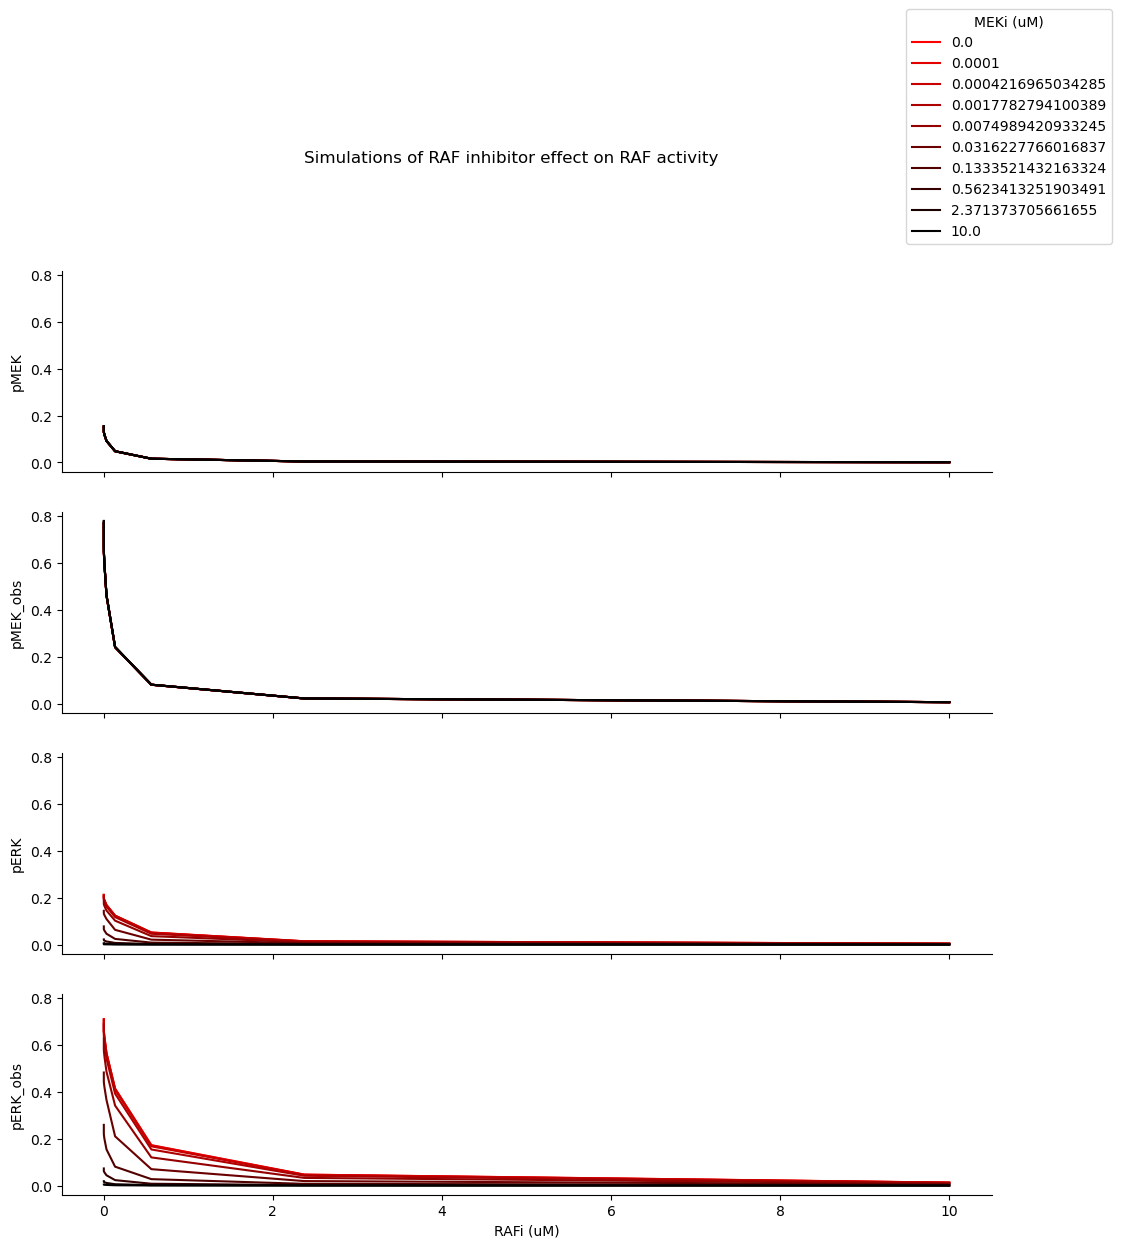

In [5]:
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

#define observables to plot
plt_obs=list(dr_df.columns);
plt_obs=['pMEK', 'pMEK_obs', 'pERK', 'pERK_obs'];

#define figure 
fig, ax = plt.subplots(len(plt_obs),1, figsize=(12, 12), sharey=True);
fig.suptitle("Simulations of RAF inhibitor effect on RAF activity");  

#define plot colors
colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cmap = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)
#cmap=plt.get_cmap('winter');
col=cmap(np.linspace(0.0, 1.0, len(MEK)))[::-1];

#simulate the different parameter combinations
ss_v = np.empty([len(RAF), len(plt_obs)]);

for j in range(len(MEK)):
    for z in range(len(plt_obs)):
        matrix = dr_df[[dr_df.columns[z]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = dr_df.columns[z])
        #plot simualtion 
        h=ax[z].plot(list(matrix.index), matrix.iloc[:,j], color = col[j,:]);   
        ax[z].spines[['right', 'top']].set_visible(False)
        #ax[z].set_xscale('log');
        #set axis names
        ax[z].set_ylabel(plt_obs[z]);
        if (z==(len(plt_obs)-1)):
            ax[z].set_xlabel('RAFi (uM)');
        else:
            ax[z].set_xticklabels([]);
print(list(np.round(10**matrix.columns,4).astype('str')))                
#add legend
fig.legend(ax, labels= list(matrix.columns.astype('str')) , 
           bbox_to_anchor=(1,1), loc="center right", borderaxespad=0.0,
           title="MEKi (uM)");
#save figures in pdf format
fig.savefig('./figures/RAS_RAF_RAFi_dose_response_trial.pdf')

['1.0', '1.0002', '1.001', '1.0041', '1.0174', '1.0755', '1.3594', '3.6504', '235.1656', '10000000000.0']


/gstore/home/goetza6/.conda/envs/test_env/lib/python3.8/site-packages/pandas/core/indexes/base.py:920: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/local/7965683/ipykernel_13187/4237307388.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lnd = fig.legend(ax, labels=list(np.round(np.log10(matrix.columns),2).astype('str')), title="Belvarafenib\n(log $\mu$M)",ncol = 1,loc='upper left', bbox_to_anchor=(1, .7));


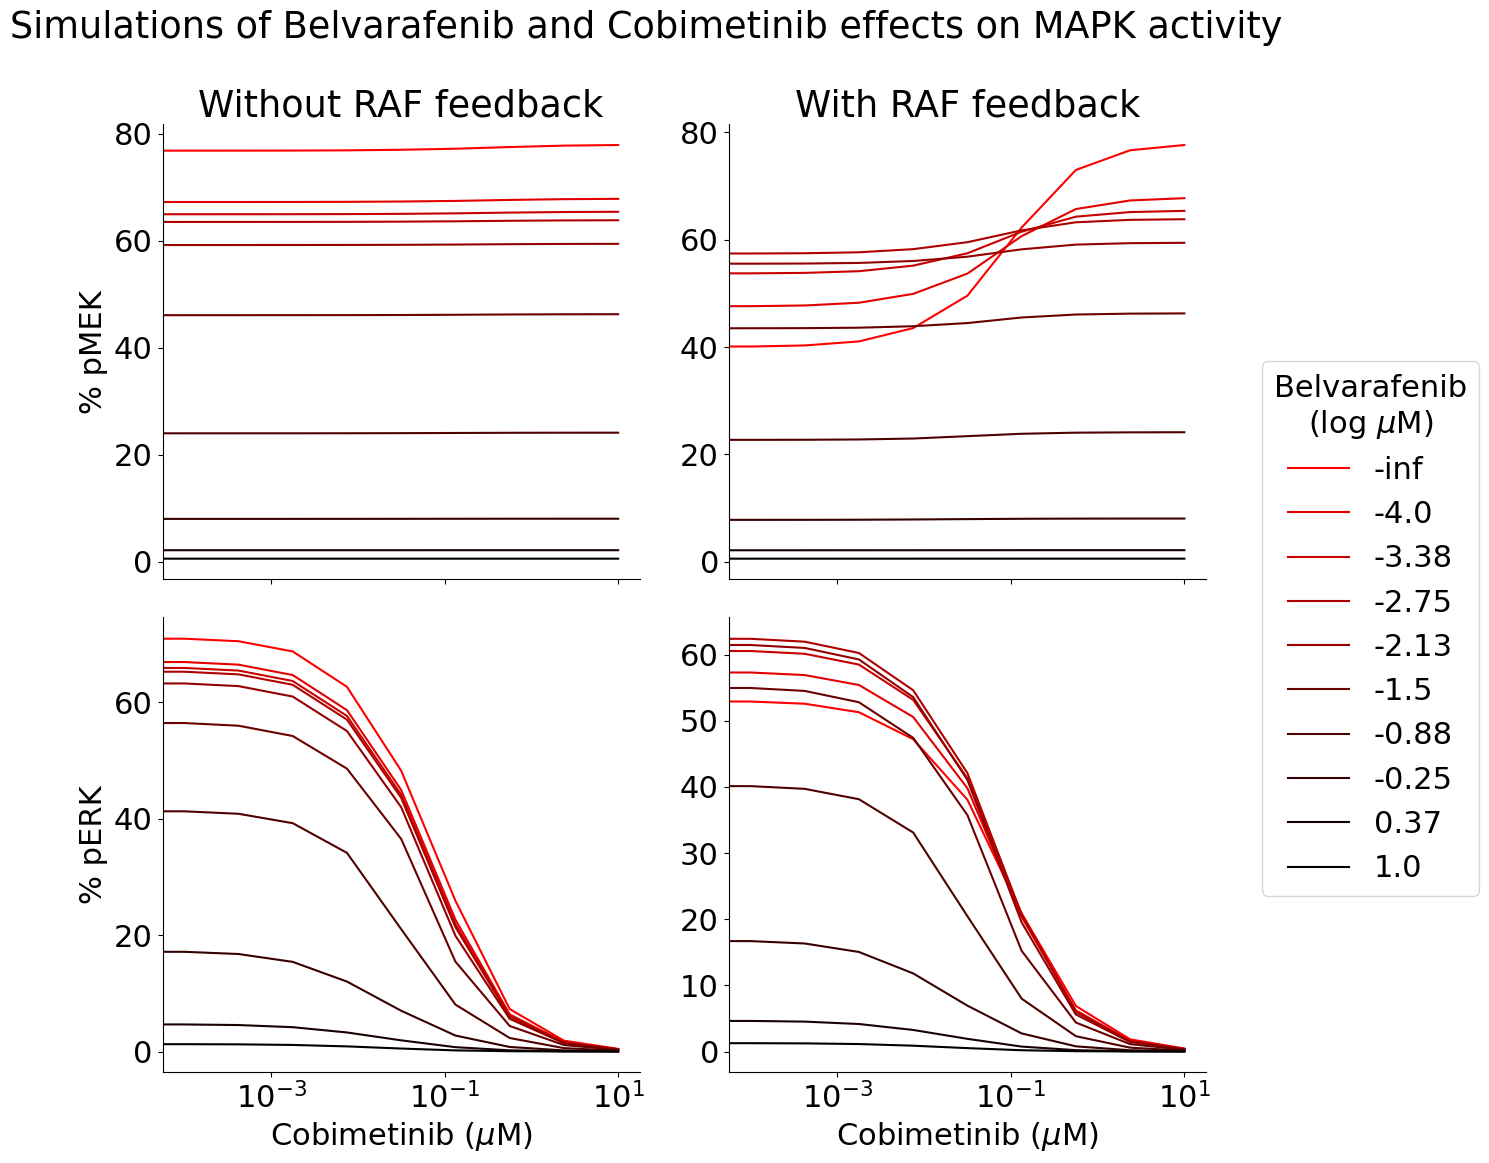

In [59]:
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

# condition dataframe list
cdf_list = [dr_df_no_CRAF,dr_df_CRAF]
title_cdf_list = ["Without RAF feedback", "With RAF feedback"]

#define observables to plot
plt_obs=list(dr_df.columns);
plt_obs=['pMEK_obs', 'pERK_obs'];
plt_name_dict = {'pMEK_obs':"% pMEK",'pERK_obs':"% pERK"}

#define figure 
fig, ax = plt.subplots(len(plt_obs),len(cdf_list), figsize=(12, 12), sharex=True,sharey = True);
fig.suptitle("Simulations of Belvarafenib and Cobimetinib effects on MAPK activity");  

#define plot colors
colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cmap = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)
#cmap=plt.get_cmap('winter');
col=cmap(np.linspace(0.0, 1.0, len(RAF)))[::-1];



#simulate the different parameter combinations
ss_v = np.empty([len(MEK), len(plt_obs)]);
for i in range(len(cdf_list)):
    for j in range(len(RAF)):
        for z in range(len(plt_obs)):
            matrix = cdf_list[i][[plt_obs[z]]].pivot_table(index = "MEKi_0_uM",columns = "RAFi_0_uM",values = plt_obs[z])
            #plot simualtion 
            h=ax[z,i].plot(list(matrix.index), matrix.iloc[:,j], color = col[j,:]);   
            ax[z,i].spines[['right', 'top']].set_visible(False)
            ax[z,i].set_xscale('log');
            #set axis names
            if z == 0:
                ax[z,i].set_title(title_cdf_list[i])
            if i == 0:
                ax[z,i].set_ylabel(plt_name_dict[plt_obs[z]]);
            if (z==(len(plt_obs)-1)):
                ax[z,i].set_xlabel('Cobimetinib ($\mu$M)');
            else:
                ax[z,i].set_xticklabels([]);
print(list(np.round(10**matrix.columns,4).astype('str')))                
#add legend
lnd = fig.legend(ax, labels=list(np.round(np.log10(matrix.columns),2).astype('str')), title="Belvarafenib\n(log $\mu$M)",ncol = 1,loc='upper left', bbox_to_anchor=(1, .7));
plt.setp(lnd.get_title(), multialignment='center')
plt.tight_layout()
#save figures in pdf format
plt.savefig('./figures/dr_curves/dr.svg',format='svg', bbox_inches='tight')